# Analyzing Mobile App Data

We are working for a company that builds Android and iOS mobile apps. All our apps are free to download and install and our main sourc eof revenue consists of in-app ads. As such the number of users in our apps determine the revenue we get. More users are preferrable as that means we are more likely to gain more revenue.

Here, I am analyzing data to help the developers understand the knid of apps that have would more likely attract a larger group of people, thereby increasing the chances of more earnings

## 1. Opening and Exploring Data

In [1]:
def open_data(path_to_file, separate=False, include_header=True):
    opened_data = open(path_to_file, encoding='utf8')
    from csv import reader
    data = list(reader(opened_data))
    
    if separate:
        return data[0], data[1:]
    elif include_header:
        return data
    else:
        return data[1:]
        

def explore_data(dataset, start, end, rows_and_columns=True):
    dataset_slice = dataset[start:end]
    
    for row in dataset_slice:
        print(row)
        print('\n')
        
    if rows_and_columns:
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CEE5-34DC

 Directory of C:\Users\Administrator\Desktop

03/08/2023  03:31 PM    <DIR>          .
03/08/2023  03:31 PM    <DIR>          ..
03/08/2023  12:52 PM    <DIR>          .ipynb_checkpoints
03/08/2023  12:52 PM           725,761 AppleStore.csv
03/07/2023  07:53 AM            29,648 Capture.PNG
03/08/2023  12:52 PM         1,349,314 googleplaystore.csv
03/03/2023  10:04 AM    <DIR>          New folder
03/08/2023  03:31 PM         1,519,345 Untitled.ipynb
               4 File(s)      3,624,068 bytes
               4 Dir(s)  162,497,982,464 bytes free


### 1.1. Opening Data

In [3]:
google_playstore =  open_data('./googleplaystore.csv', separate=True)
apple_store =open_data('./AppleStore.csv', separate=True)

google_playstore_header = google_playstore[0]
apple_store_header = apple_store[0]

google_playstore_data = google_playstore[1]
apple_store_data = apple_store[1]

### 1.2. Explore Data

In [4]:
google_playstore_header

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [123]:
apple_store_header

['id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic']

In [5]:
explore_data(google_playstore_data, 0 ,3 )

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns:  13


In [125]:
explore_data(apple_store_data, 0, 3)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns:  16


## 2. Deleting Wrong Data

This data contains a wrong entry for the "rating" column wiht the next columns having been shifted. Total number of columns in this record is, therefore, 12 in stead of the expected 13

In [6]:
del google_playstore_data[10473]

## 3. Use digits Only on Reviews

We do this because for some numbers, they are entered as "3.0M", signifying "3,000,000". We want to get it all uniform by making all numbers as digits

In [7]:
import re
def replace_chars_with_zeros(data, column):
    result = []
    for item in data:
        item[column] = re.sub("K", "000", item[column])
        item[column] = re.sub("M", "000000", item[column])

        result.append(item)
        
    return result

In [126]:
google_playstore_data = replace_chars_with_zeros(google_playstore_data, 3)
apple_store_data = replace_chars_with_zeros(apple_store_data, 4)

## 4. Remove Duplicate Entries

### 4.1 Remove Duplicate Entries: Part 1

Here, we see that some apps appear more than once

In [9]:
def get_duplicate_entries(apps_data, app_name_column=0):
    duplicate_app_entries = {}
    all_apps = set()
    for app_data in apps_data[1:]:
        app_name = app_data[app_name_column]

        if(app_name not in all_apps):
            all_apps.add(app_name)
        elif(app_name in all_apps and app_name not in duplicate_app_entries):
            duplicate_app_entries[app_name] = 2
        else:
            duplicate_app_entries[app_name] += 1
    
    return duplicate_app_entries

In [10]:
google_duplicate_entries = get_duplicate_entries(apps_data = google_playstore_data, app_name_column=0)

In [11]:
google_duplicate_entries

{'Quick PDF Scanner + OCR FREE': 3,
 'Box': 3,
 'Google My Business': 3,
 'ZOOM Cloud Meetings': 2,
 'join.me - Simple Meetings': 3,
 'Zenefits': 2,
 'Google Ads': 3,
 'Slack': 3,
 'FreshBooks Classic': 2,
 'Insightly CRM': 2,
 'QuickBooks Accounting: Invoicing & Expenses': 3,
 'HipChat - Chat Built for Teams': 2,
 'Xero Accounting Software': 2,
 'MailChimp - Email, Marketing Automation': 2,
 'Crew - Free Messaging and Scheduling': 2,
 'Asana: organize team projects': 2,
 'Google Analytics': 2,
 'AdWords Express': 2,
 'Accounting App - Zoho Books': 2,
 'Invoice & Time Tracking - Zoho': 2,
 'Invoice 2go — Professional Invoices and Estimates': 2,
 'SignEasy | Sign and Fill PDF and other Documents': 2,
 'Genius Scan - PDF Scanner': 2,
 'Tiny Scanner - PDF Scanner App': 2,
 'Fast Scanner : Free PDF Scan': 2,
 'Mobile Doc Scanner (MDScan) Lite': 2,
 'TurboScan: scan documents and receipts in PDF': 2,
 'Tiny Scanner Pro: PDF Doc Scan': 2,
 'Docs To Go™ Free Office Suite': 2,
 'OfficeSuite : 

In the above finding, Instagram occurred four times. We need to remove such instances of duplication, but we won't be doing it anyhowly. We can see that for Instagram, even though it was duplicated four times, they all differed in the number of reviews which indicates how recent the data was collected. We can use the record with the biggest number of reviews since it is likely to be the most recent and discard the others

In [12]:
for app in google_playstore_data:
    app_name = app[0]
    
    if(app_name == 'Instagram'):
        print(app)
        print('\n')

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']




### 4.2. Remove Duplicated Entries: Part 2

In [13]:
def get_max_reviews(apps_data, app_name_column, review_column):
    max_review = {}
    for app_data in apps_data:
        app_name = app_data[app_name_column]
        app_review = float(app_data[review_column])
        
        if(app_name in max_review):
            if(app_review > max_review[app_name]):
                max_review[app_name] = float(app_review)
        else:
            max_review[app_name] = float(app_review)
    
    return max_review

def remove_duplicates(data, max_review_data, app_name_column, app_review_column):
    result = []
    for app_info in data:
        app_name = app_info[app_name_column]
        app_review = float(app_info[app_review_column])
        app_max_review = max_review_data[app_name]

        
        if(app_review == app_max_review):
            result.append(app_info)
            
    return result
            

In [14]:
google_playstore_max_reviews = get_max_reviews(google_playstore_data, 0, 3)

In [15]:
google_playstore_data_without_duplicates = remove_duplicates(google_playstore_data, google_playstore_max_reviews, 0, 3)

## 5. Remove Non-English Apps

Non-English apps have been identified by having characters that are not common in the words used in English. Here, an app is considered not English if over 90% of the characters making up its clean name (after removing emojis) are not common in English words

In [56]:
from cleantext import clean

def is_probably_english(app_name):
    
    #Remove emoji on name
    clean_app_name = clean(app_name, no_emoji=True)
    
    non_english_characters = 0
    for character in clean_app_name:
        if ord(character) > 127:
            non_english_characters += 1
            
    return (non_english_characters / len(clean_app_name)) < 0.1

def remove_non_english_apps(apps_data, app_name_column):
    english_apps = []
    for app_data in apps_data:
        app_name = app_data[app_name_column]
        if(is_probably_english(app_name)):
            english_apps.append(app_data)
            
    return english_apps        

In [128]:
english_android_apps = remove_non_english_apps(google_playstore_data_without_duplicates, 3)
english_iphone_apps = remove_non_english_apps(apple_store_data, 0)
len(english_android_apps)

10054

In [59]:
is_probably_english('Docs To Go™ Free Office Suite')

True

## 6. Isolate Free Apps

In [67]:
def isolate_free_apps(apps_data, price_column):
    free_apps = []
    
    for app_data in apps_data:
        app_price = float(app_data[price_column])
        
        if(app_price == 0.0):
            free_apps.append(app_data)
            
    return free_apps

In [131]:
free_android_apps = isolate_free_apps(english_android_apps, 3)
free_iphone_apps = isolate_free_apps(english_iphone_apps, 4)

## 7. Most Common Apps by Genre

### 7.1. Most Common Apps by Genre: Part 1

Here, we want to understand what kind of apps are popular on both android and iPhones. This will guide what to do next as the compnay is planning to develope apps that are more likely to succeed on both markets.

In [121]:
import matplotlib.pyplot as plt

def get_frequency(apps_data, app_type_column):
    app_type_frequency = {}
    for app_data in apps_data:
        app_type = app_data[app_type_column]
        if(app_type in app_type_frequency):
            app_type_frequency[app_type] += 1
        else:
            app_type_frequency[app_type] = 0
            
    return app_type_frequency

def sort_frequency(dictionary):
    tuple_list = []
    for item in dictionary:
        tuple_list.append((item, dictionary[item]))
        
    tuple_list.sort(key=lambda x: x[1])
    
    return tuple_list

def show_frequency(apps_data, app_type_column):
    app_type_frequency = get_frequency(apps_data, app_type_column)
    sorted_frequency = sort_frequency(app_type_frequency)
    
    names = [i[0] for i in sorted_frequency]
    values = [i[1] for i in sorted_frequency]

    plt.barh(range(len(sorted_frequency)), values, tick_label=names)
    plt.rcParams["figure.figsize"] = (24, 12)
    plt.show()

Here we see that business apps are the most frequent free apps followed by family and medical apps for android apps. For IOs, however, games are extremely popular relative to other categories. Generally, the most popular free apps for iPhones are for entertainment (Games, entertainment, photos & videos, and social network), while for android, it is kind of a mixture.

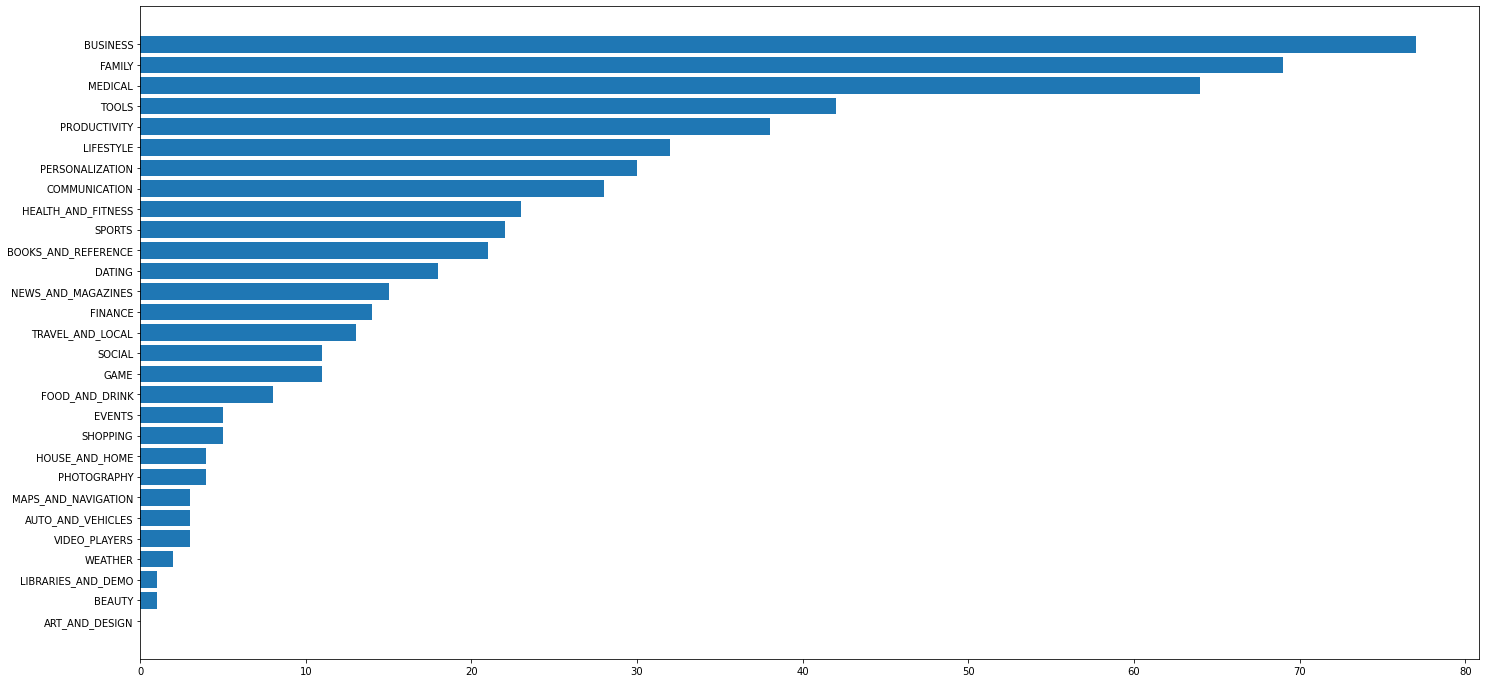

In [135]:
show_frequency(free_android_apps, 1)

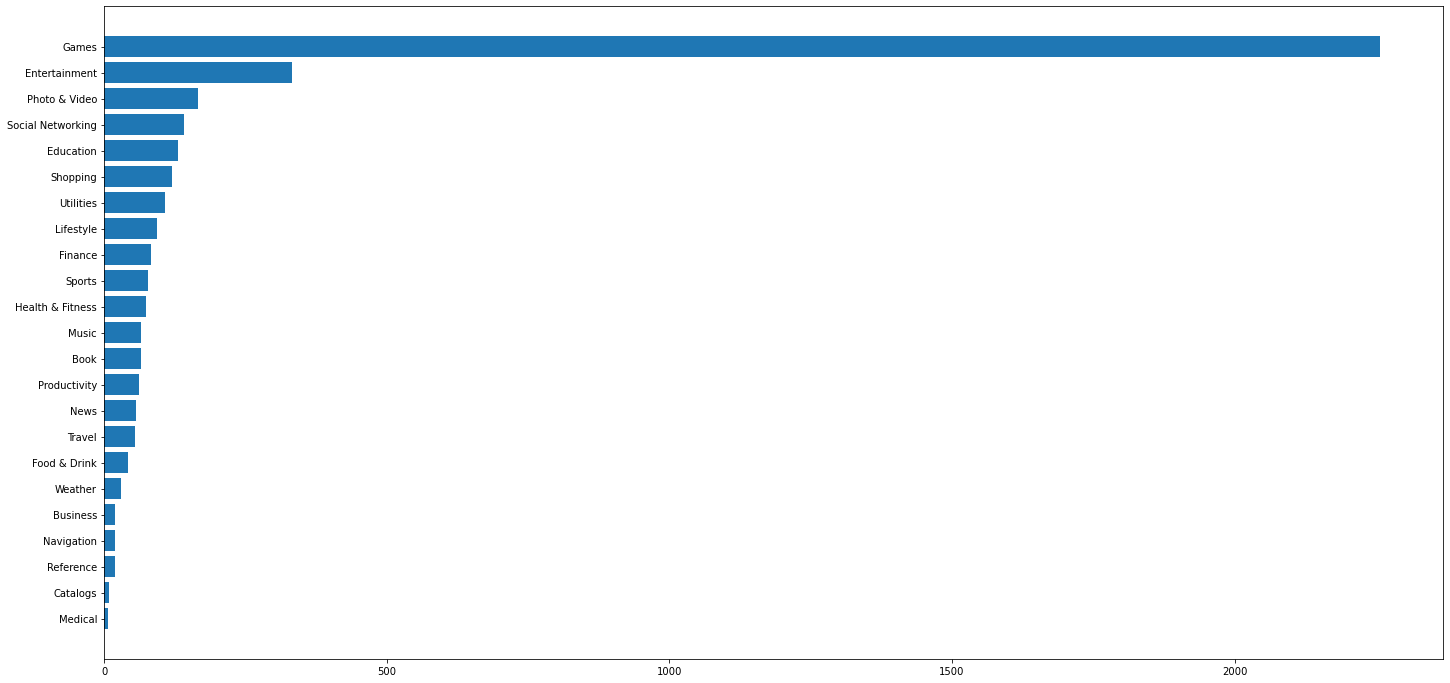

In [133]:
show_frequency(free_iphone_apps, 11)